## Loan Repayment Prediction
I NEED TO FIND OUT IF MY CUSTOMERS ARE GOING TO RETURN THE LOAN THEY TOOK FROM MY BANK OR NOT

In [1]:
# import the necessary packages
import numpy as np # mathematical functions
import pandas as pd # data manipulation
import joblib # Saving Model
import pickle
from sklearn.model_selection import train_test_split # splitting data
from sklearn.metrics import accuracy_score # score the setup
from sklearn import tree # basic tree func for the decision tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading Dataset
data = pd.read_csv('./Decision_Tree_ Dataset.csv')
data.head(10)

,Initial Payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
5,406,10187,166,3068,13827,yes
6,461,10252,172,3062,13947,yes
7,158,10192,144,3469,13963,yes
8,136,10376,230,3223,13965,yes
9,194,10092,626,3083,13995,yes


In [3]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Initial Payment  1000 non-null   int64 
 1   Last Payment     1000 non-null   int64 
 2   Credit Score     1000 non-null   int64 
 3   House Number     1000 non-null   int64 
 4   Sum              1000 non-null   int64 
 5   Result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [4]:
data['Result'] = data['Result'].apply(lambda x: 1 if x == 'yes' else 0)

In [5]:
data

,Initial Payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,1
1,205,10016,395,3044,13660,1
2,257,10129,109,3251,13746,1
3,246,10064,324,3137,13771,1
4,117,10115,496,3094,13822,1
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,0
996,359,14423,927,4838,20547,0
997,316,14872,613,4760,20561,0
998,305,14926,897,4572,20700,0


In [6]:
# length of the dataset
print("Dataset Length:: ", len(data))

Dataset Length::  1000


In [7]:
# shape of dataset
print("Dataset Shape:: ", data.shape)

Dataset Shape::  (1000, 6)


In [8]:
# Seperating the target var
X = data.values[:, 1:5]# : select all the lines in the dataset, 1:5 select columns 1 thru 5
y = data.values[:, 5]

In [9]:
# Splittling the dataset into test and train portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [10]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (700, 4)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")


Logistic Regression: 0.6233333333333333
K-Nearest Neighbors: 0.9933333333333333
Support Vector Machines: 0.98
Decision Trees: 1.0
Random Forests: 1.0


In [13]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")


Best model: RandomForestClassifier(min_samples_leaf=2, n_estimators=10)
Best score: 1.0
CPU times: total: 2.2 s
Wall time: 2min 26s


In [14]:
# Train the model
best_model=best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 1.0


In [15]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC-ROC: 1.0000


Text(0.5, 1.0, 'Confusion Matrix')

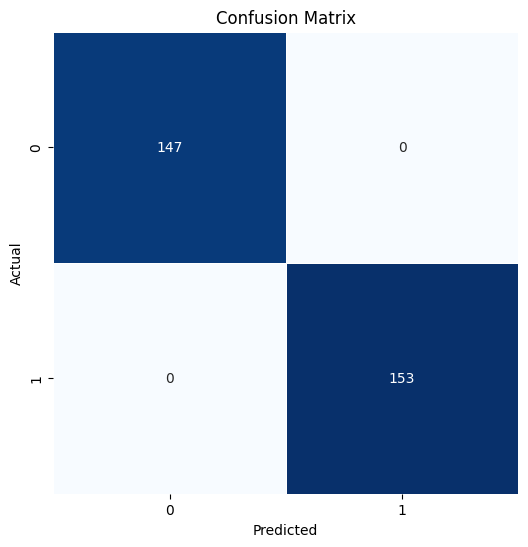

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [17]:
joblib.dump(best_model, "my_model2.pkl", compress=True)

['my_model2.pkl']

In [ ]:
# with open("my_model1.pkl", "wb") as file:
#     pickle.dump(best_model, file)

In [ ]:
# # Load the model using pickle
# with open("my_model1.pkl", "rb") as file:
#     model = pickle.load(file)

In [ ]:
# pip show scikit-learn

In [ ]:
# pip install --upgrade scikit-learn